In [7]:
import aerosandbox as asb
import aerosandbox.numpy as np

from tqdm import tqdm

from aerosandbox.tools.pretty_plots import plt, sns, mpl, show_plot, palettes, adjust_lightness, set_ticks


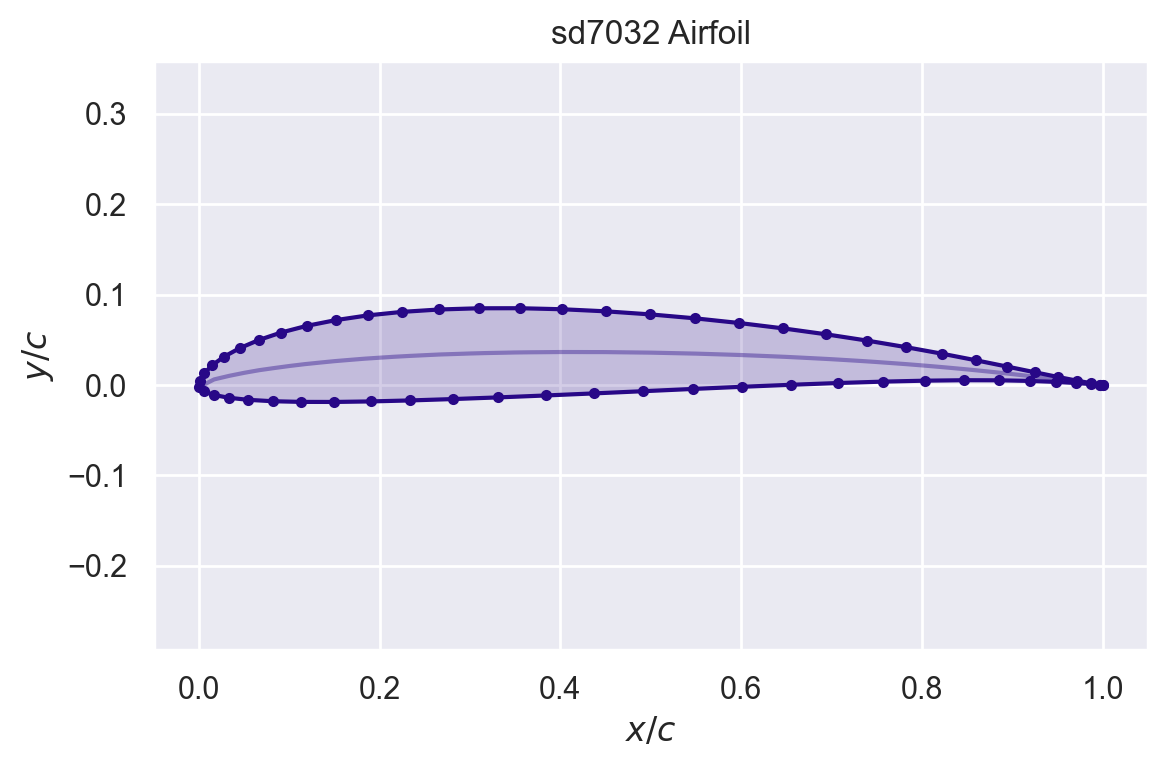

In [8]:
a = asb.Airfoil("sd7032")

fig, ax = plt.subplots()
a.draw(backend='matplotlib')
plt.show()

In [9]:
alphas = np.linspace(-3, 14, 50)
alpha_threshold = 0
alpha_upper = np.sort(alphas[alphas >= alpha_threshold])
alpha_lower = np.sort(alphas[alphas < alpha_threshold])[::-1]

xf = asb.XFoil(
    airfoil=a,
    Re=1e6,
    # mach=0.6
)

run1 = xf.alpha(alpha_upper)
run2 = xf.alpha(alpha_lower)

data = {
    k: np.hstack((
        run1[k],
        run2[k]
    ))
    for k in run1.keys()
}

In [10]:
def make_fit(fit_type):
    return asb.FittedModel(
        model=lambda x, p: p["a"] * x ** 2 + p["b"] * x + p["c"],
        x_data=data["alpha"],
        y_data=data["CD"],
        parameter_guesses={
            "a": 0,
            "b": 0,
            "c": 0,
        },
        residual_norm_type="L2",
        fit_type=fit_type,
        verbose=False
    )


fit_types = [
    "best",
    "upper bound",
    "lower bound",
]

fit = {
    fit_type: make_fit(fit_type)
    for fit_type in fit_types
}

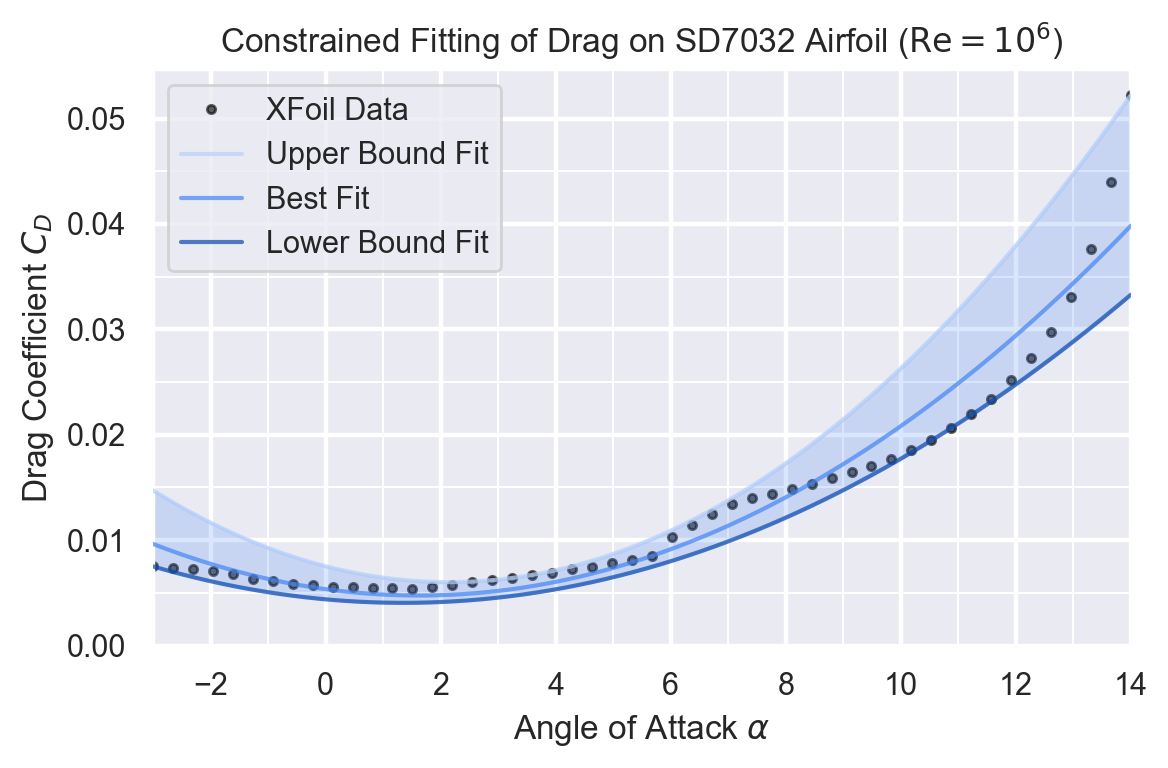

In [12]:
fig, ax = plt.subplots()
plt.plot(
    data["alpha"],
    data["CD"],
    ".k",
    alpha=0.6,
    label="XFoil Data",
    zorder=2.4
)

alpha_plot = np.linspace(
    data["alpha"].min(),
    data["alpha"].max(),
    500,
)
low = fit["lower bound"](alpha_plot)
med = fit["best"](alpha_plot)
high = fit["upper bound"](alpha_plot)

plt.plot(alpha_plot, high,
         label="Upper Bound Fit",
         color=adjust_lightness(palettes["categorical"][0], 1.4),
         alpha=0.7,
         zorder=2.9
         )
plt.plot(alpha_plot, med,
         label="Best Fit",
         color=palettes["categorical"][0],
         alpha=0.7,
         zorder=2.9
         )
plt.plot(alpha_plot, low,
         label="Lower Bound Fit",
         color=adjust_lightness(palettes["categorical"][0], 0.6),
         alpha=0.7,
         zorder=2.9
         )
plt.fill_between(
    alpha_plot, low, high,
    color=palettes["categorical"][0],
    alpha=0.2,
    zorder=2.5
)
plt.xlim(alpha_plot.min(), alpha_plot.max())
plt.ylim(bottom=0)

set_ticks(
    2, 1,
    0.01, 0.005
)

show_plot(
    rf"Constrained Fitting of Drag on {a.name.upper()} Airfoil ($\mathrm{{Re}}=10^6$)",
    r"Angle of Attack $\alpha$",
    r"Drag Coefficient $C_D$",
    show=False
)
# plt.savefig(r"C:\Users\User\Dropbox (MIT)\School\Grad School\2021 Spring\Thesis\TeX\figures\constrained-fitting.pgf")
plt.show()